<a href="https://colab.research.google.com/github/ATurchenko/ATurchenko/blob/main/Turchenko2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib as npl
import seaborn as sns

from matplotlib import rcParams
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler,    LabelEncoder, PolynomialFeatures
from sklearn.preprocessing import Normalizer

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn import metrics


In [16]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow  import keras
from keras  import layers
from keras import models
from  keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LayerNormalization



from keras.layers import  Dropout

from keras.layers import Embedding

from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D



In [17]:
import joblib
import datetime
%matplotlib inline

In [18]:
xbp = pd.read_excel('/content/sample_data/X_bp.xlsx') 
xbp


,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...
1018,1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [19]:
xbp.describe()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,511.000000,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144
std,295.458965,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931
min,0.000000,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,255.500000,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520
50%,511.000000,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882
75%,766.500000,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724
max,1022.000000,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


In [20]:
xnup = pd.read_excel('/content/sample_data/X_nup.xlsx')
xnup

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,0.0,4.000000,57.000000
1,1.0,0.0,4.000000,60.000000
2,2.0,0.0,4.000000,70.000000
3,3.0,0.0,5.000000,47.000000
4,4.0,0.0,5.000000,57.000000
...,...,...,...,...
1035,1035.0,90.0,8.088111,47.759177
1036,1036.0,90.0,7.619138,66.931932
1037,1037.0,90.0,9.800926,72.858286
1038,1038.0,90.0,10.079859,65.519479


In [21]:
xnup.describe()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1040.000000,1040.00000,1040.000000,1040.000000
mean,519.500000,45.00000,6.911385,57.248399
std,300.366443,45.02165,2.555181,12.332438
min,0.000000,0.00000,0.000000,0.000000
25%,259.750000,0.00000,5.102256,49.970740
50%,519.500000,45.00000,6.938000,57.413594
75%,779.250000,90.00000,8.587662,65.107235
max,1039.000000,90.00000,14.440522,103.988901


In [22]:

df = pd.concat([xbp, xnup], axis=1, join='inner')

df.drop(columns= ['Unnamed: 0'], axis=1, inplace=True)
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [23]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


In [24]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [25]:
def hist_and_boxplot(df: pd.DataFrame)  -> None:
    for i_column in df.columns:
        print('{column}:'.format(column=i_column))

        series = df[i_column]
        sns.set_style("darkgrid")
        sns.kdeplot(data=series, shade=True, palette='dark')
        plt.show()

        sns.boxenplot(x=series);
        plt.show()
        




Соотношение матрица-наполнитель:


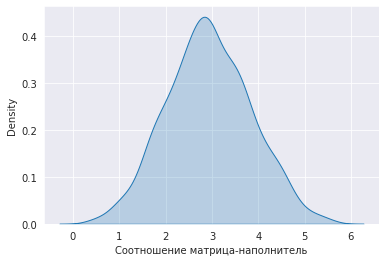

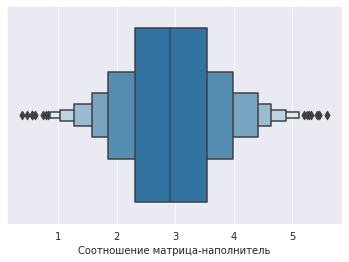

Плотность, кг/м3:


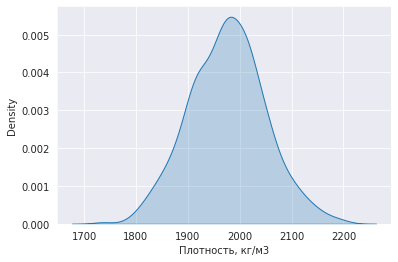

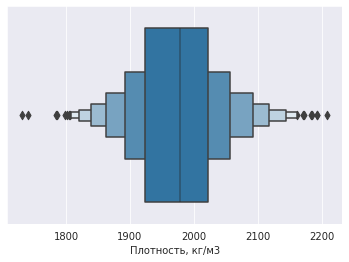

модуль упругости, ГПа:


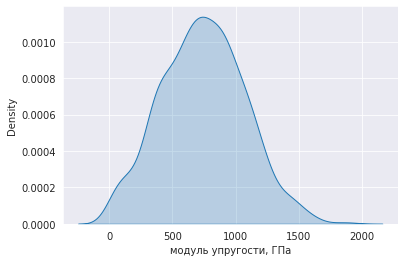

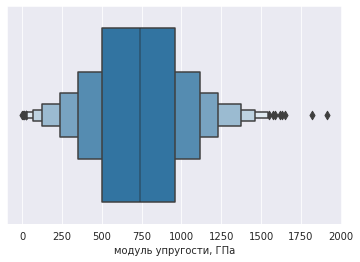

Количество отвердителя, м.%:


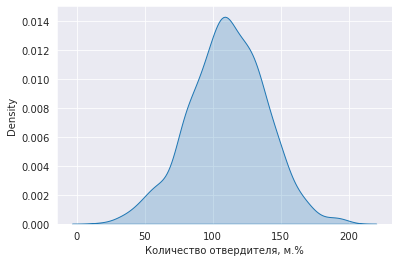

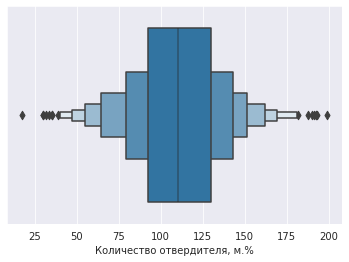

Содержание эпоксидных групп,%_2:


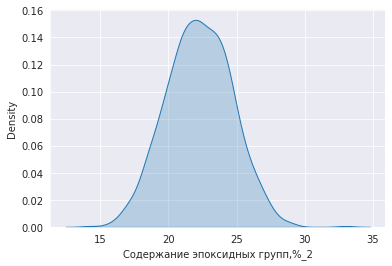

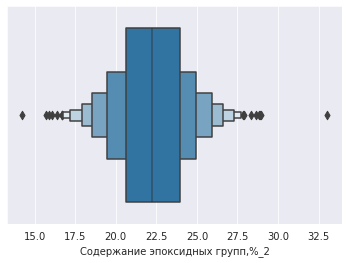

Температура вспышки, С_2:


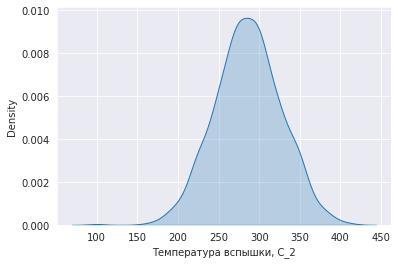

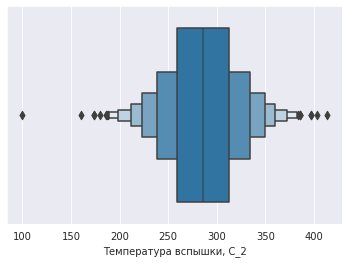

Поверхностная плотность, г/м2:


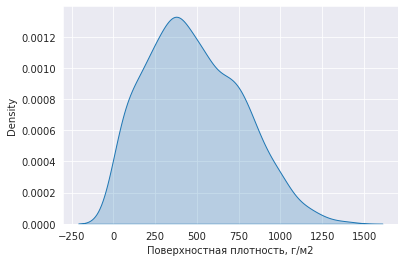

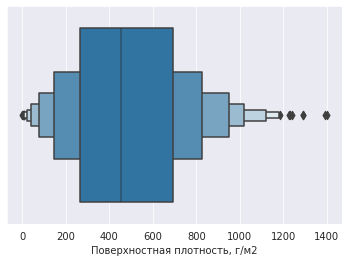

Модуль упругости при растяжении, ГПа:


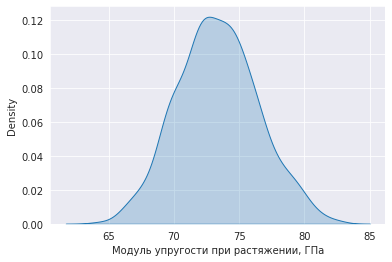

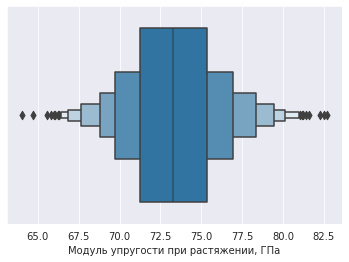

Прочность при растяжении, МПа:


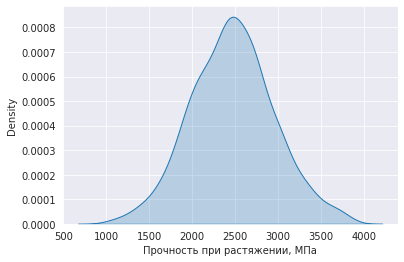

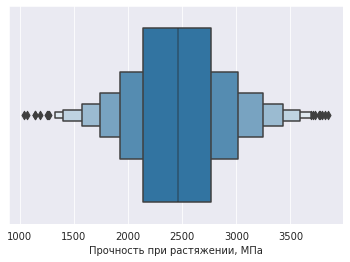

Потребление смолы, г/м2:


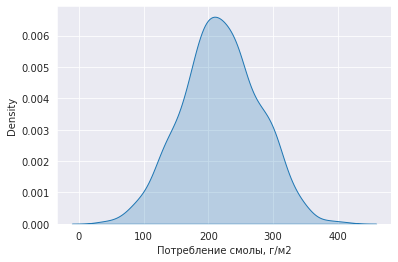

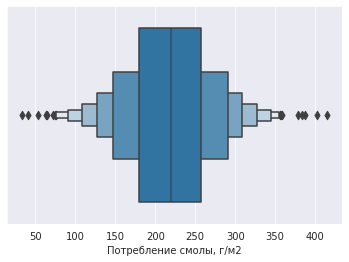

Угол нашивки, град:


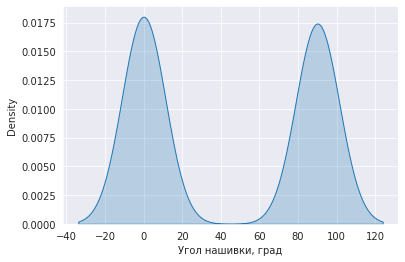

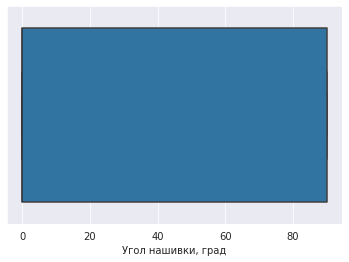

Шаг нашивки:


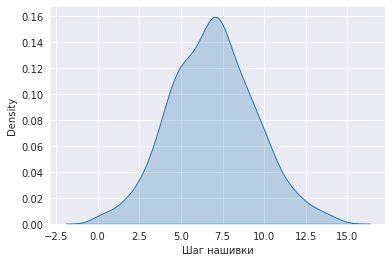

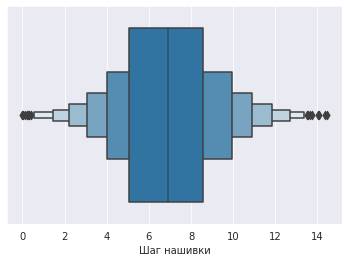

Плотность нашивки:


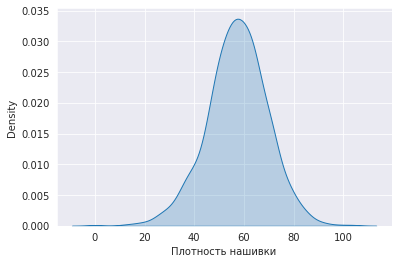

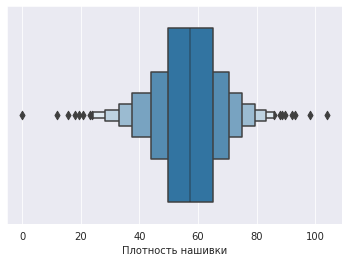

In [26]:
hist_and_boxplot(df)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1c3780490>,
      dtype=object)

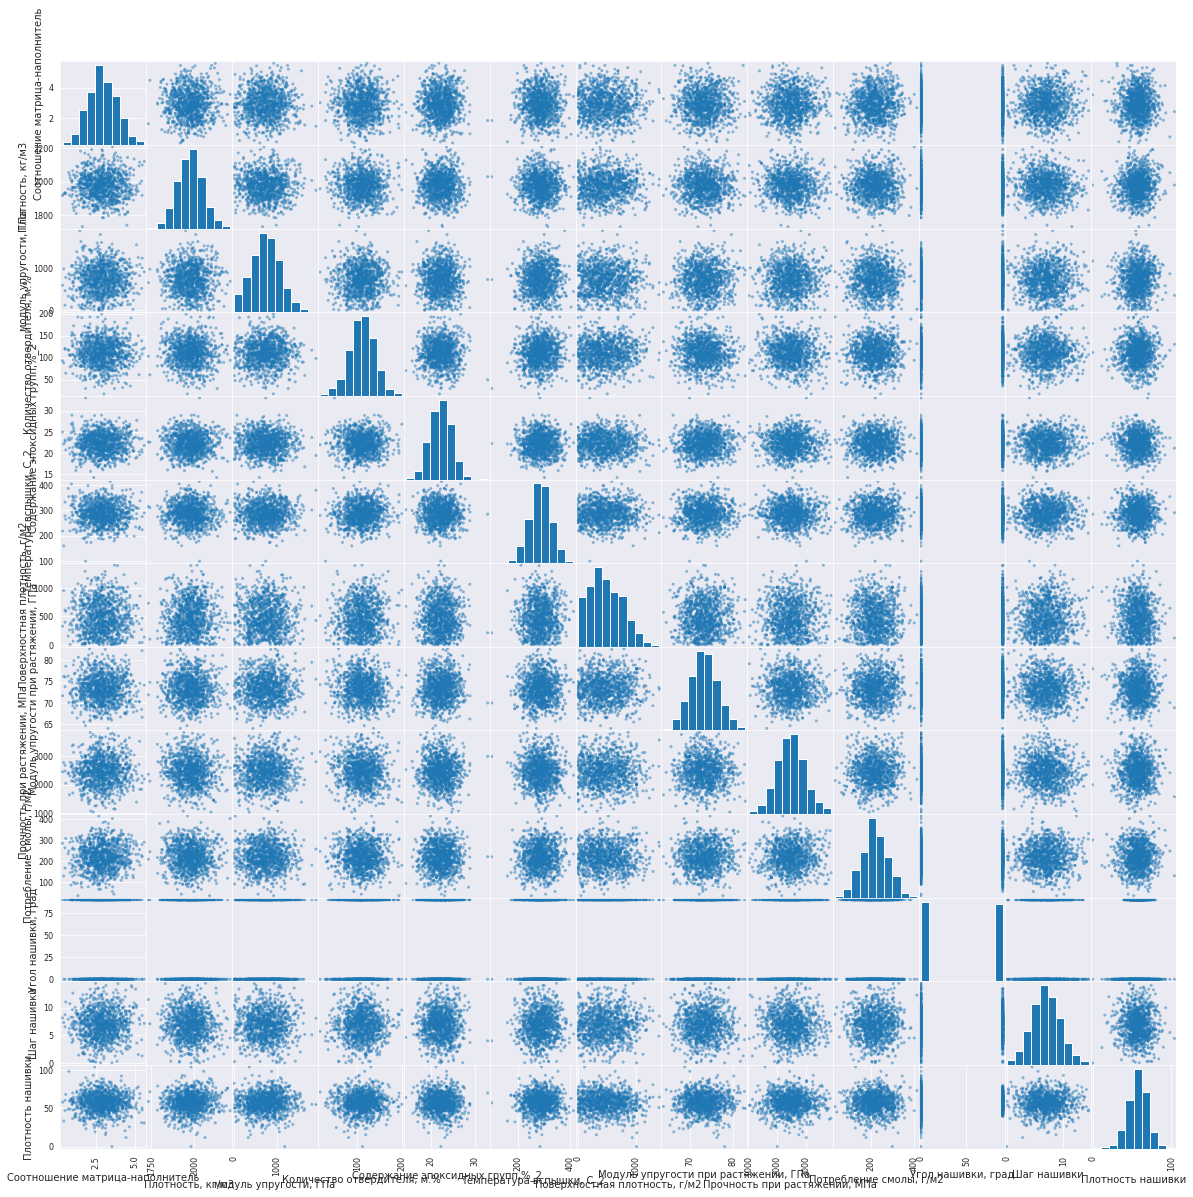

In [27]:
pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(20,20), diagonal='hist')

In [28]:
def remove_outliers_inplace(df: pd.DataFrame, columns_to_remove:  list) -> None:
    for i_column in filter_columns:
        q75, q25 = np.percentile(df.loc[:, i_column], [75,25])
        intr_qr = q75 - q25
        column_max = q75 + (1.5*intr_qr)
        column_min = q25 - (1.5*intr_qr)
        df.loc[df[i_column] < column_min, i_column] = np.nan
        df.loc[df[i_column] > column_max, i_column] = np.nan

In [29]:

filter_columns = [i_column for i_column in df.columns if i_column not in 'Угол нашивки, град']
filter_columns

['Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2',
 'Шаг нашивки',
 'Плотность нашивки']

In [30]:
remove_outliers_inplace(df, filter_columns)

df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [31]:
df.dropna(inplace=True)
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [32]:
from locale import normalize
normalizer = Normalizer()
res = normalizer.fit_transform(df)
normalized_df = pd.DataFrame(res, columns=df.columns)

In [33]:
normalized_df


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.000499,0.545436,0.198490,0.013434,0.006381,0.076473,0.056424,0.018808,0.806064,0.059111,0.000000,0.001075,0.016121
1,0.000499,0.545011,0.198335,0.034634,0.005705,0.080543,0.056380,0.018793,0.805435,0.059065,0.000000,0.001342,0.012618
2,0.000744,0.544829,0.202097,0.030022,0.005976,0.076388,0.056362,0.018787,0.805167,0.059046,0.000000,0.001342,0.015298
3,0.000746,0.539271,0.201687,0.030161,0.006004,0.076742,0.056623,0.018874,0.808906,0.059320,0.000000,0.001348,0.016178
4,0.000699,0.519919,0.219673,0.030449,0.006062,0.077475,0.057164,0.019055,0.816627,0.059886,0.000000,0.001361,0.019055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.000700,0.601520,0.281289,0.026806,0.006201,0.100077,0.064463,0.022522,0.735625,0.038520,0.027733,0.002797,0.014489
932,0.001078,0.641541,0.139172,0.045683,0.006133,0.079552,0.109733,0.022819,0.738645,0.036842,0.028164,0.003306,0.016820
933,0.000953,0.572927,0.121081,0.032107,0.006959,0.072161,0.214994,0.021709,0.773510,0.068729,0.026143,0.001209,0.019645
934,0.001191,0.664389,0.238353,0.045454,0.006187,0.088652,0.206205,0.023802,0.665970,0.063368,0.028931,0.002029,0.018728


In [34]:
normalized_df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.000883,0.596191,0.220344,0.033543,0.006710,0.086399,0.144900,0.022144,0.731325,0.065667,0.013905,0.002094,0.017344
std,0.000285,0.065372,0.095871,0.009038,0.001024,0.015058,0.083867,0.002523,0.069988,0.018636,0.013753,0.000808,0.003839
min,0.000163,0.442428,0.000709,0.009669,0.004113,0.049402,0.000230,0.016105,0.462927,0.017538,0.000000,0.000011,0.007195
25%,0.000681,0.551347,0.150786,0.027556,0.005972,0.075966,0.080864,0.020394,0.687823,0.052244,0.000000,0.001530,0.014769
50%,0.000870,0.591480,0.219921,0.033470,0.006646,0.084929,0.139799,0.021957,0.741083,0.065375,0.021608,0.002048,0.017237
75%,0.001067,0.640084,0.289727,0.039519,0.007347,0.096412,0.203676,0.023751,0.780799,0.077676,0.027066,0.002628,0.019722
max,0.001803,0.823683,0.524864,0.062919,0.010879,0.147861,0.414371,0.030598,0.877580,0.122973,0.037721,0.004519,0.030905


Соотношение матрица-наполнитель:


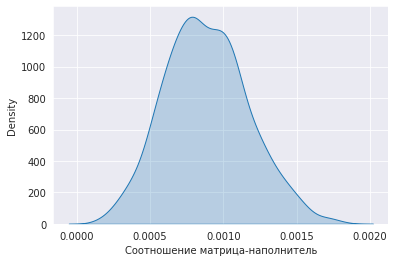

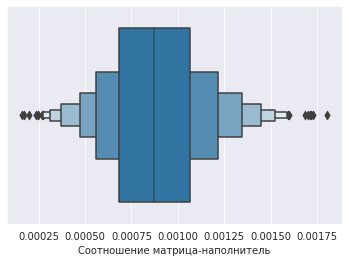

Плотность, кг/м3:


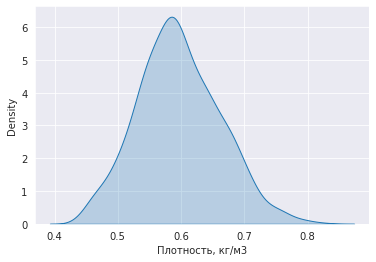

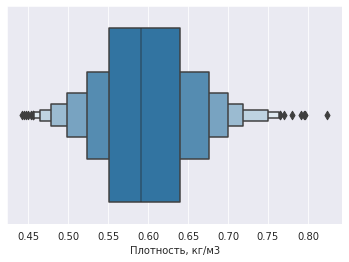

модуль упругости, ГПа:


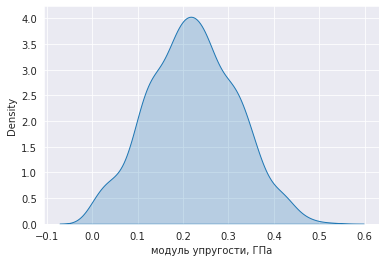

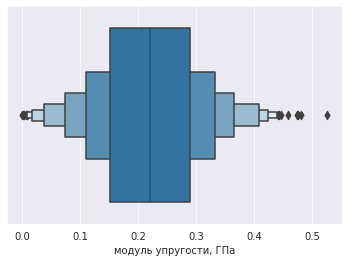

Количество отвердителя, м.%:


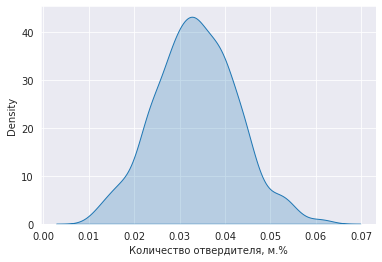

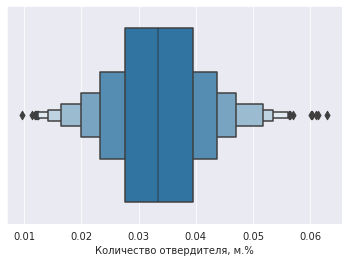

Содержание эпоксидных групп,%_2:


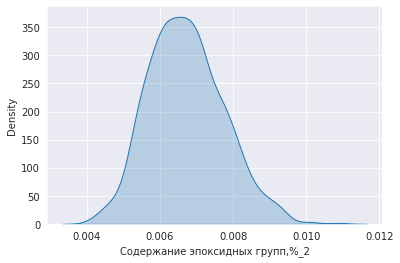

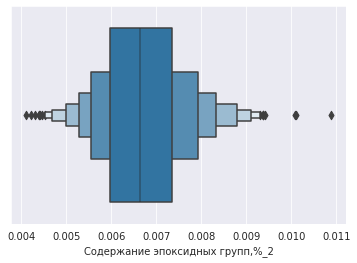

Температура вспышки, С_2:


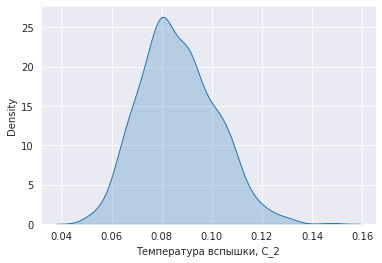

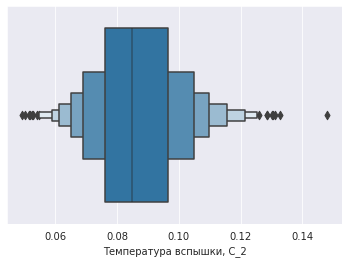

Поверхностная плотность, г/м2:


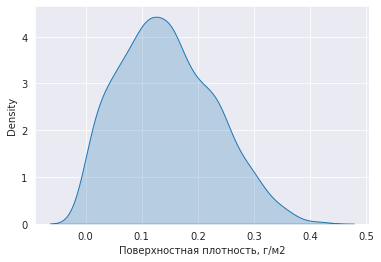

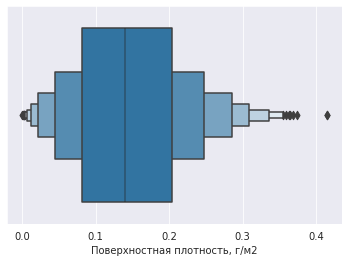

Модуль упругости при растяжении, ГПа:


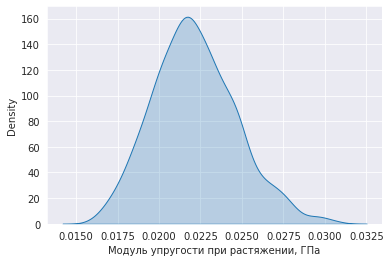

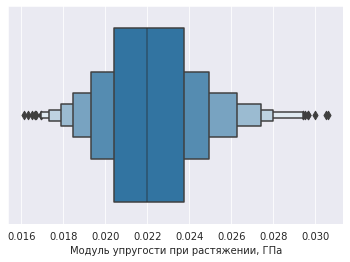

Прочность при растяжении, МПа:


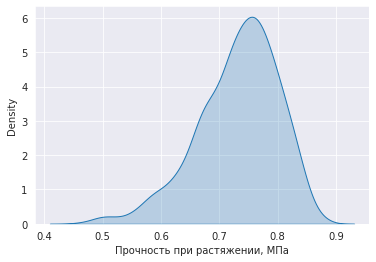

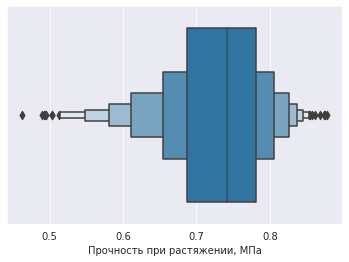

Потребление смолы, г/м2:


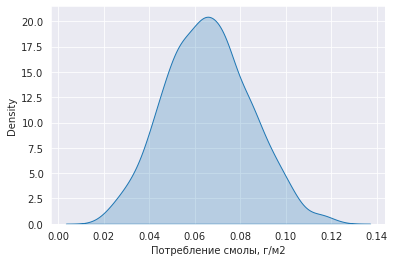

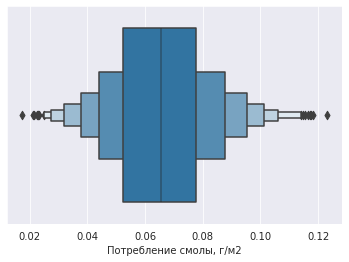

Угол нашивки, град:


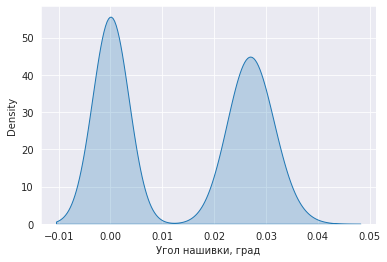

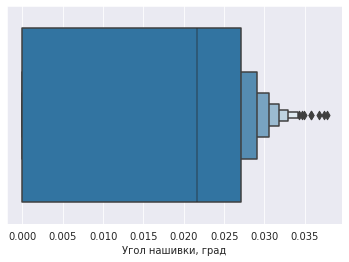

Шаг нашивки:


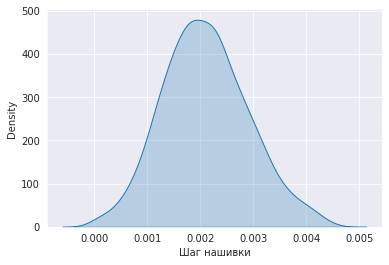

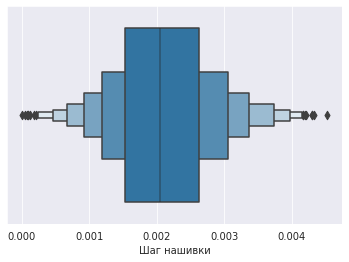

Плотность нашивки:


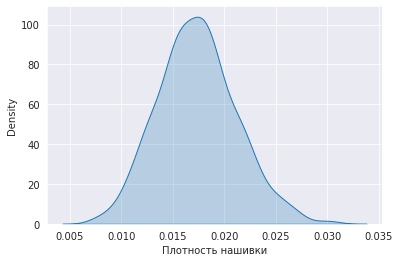

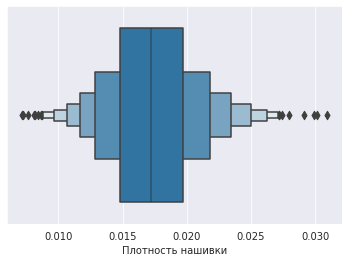

In [35]:
hist_and_boxplot(normalized_df)

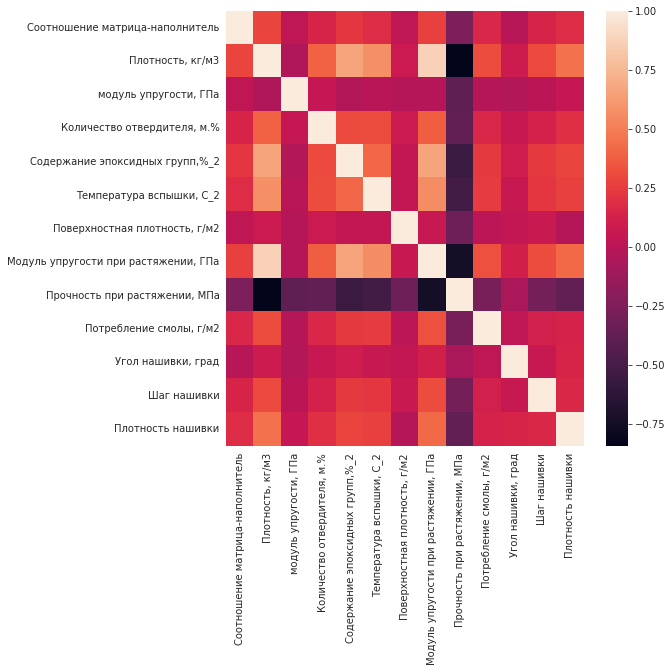

In [36]:
rcParams['figure.figsize'] = 8,8
sns.heatmap(normalized_df.corr())

In [37]:
normalized_df.corr().nlargest(3, df.columns)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.283655,0.027693,0.143589,0.227968,0.185868,0.023875,0.268223,-0.255709,0.158009,-0.012164,0.141395,0.182241
"Плотность, кг/м3",0.283655,1.000000,-0.037050,0.390909,0.663957,0.568847,0.077495,0.877625,-0.841513,0.310395,0.082265,0.303222,0.447733
"Модуль упругости при растяжении, ГПа",0.268223,0.877625,-0.021529,0.379485,0.666381,0.567735,0.062512,1.000000,-0.745488,0.324316,0.110850,0.313394,0.421513


In [38]:
input_columns = [
                  "Плотность, кг/м3",
                 	"модуль упругости, ГПа",
                  "Количество отвердителя, м.%",
                  "Содержание эпоксидных групп,%_2",
                  "Температура вспышки, С_2",
                  "Поверхностная плотность, г/м2",
                  "Модуль упругости при растяжении, ГПа",
                  "Прочность при растяжении, МПа",
                  "Потребление смолы, г/м2",
                  "Угол нашивки, град",
                  "Шаг нашивки"	,
                  "Плотность нашивки"
              ]
  


output_columns = ["Соотношение матрица-наполнитель"]

scaler = MinMaxScaler()
res2 = scaler.fit_transform(df)
scaler_df = pd.DataFrame(res2, columns=df.columns)

norm = Normalizer()
res3 = norm.fit_transform(df)
normalized_inputs = pd.DataFrame(res3, columns=df.columns)

inputs_nn = df[input_columns]
outputs_nn = df[output_columns]

inputs_nn





,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
3,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
5,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,60.000000
6,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [39]:
outputs_nn


,Соотношение матрица-наполнитель
1,1.857143
3,1.857143
4,2.771331
5,2.767918
6,2.569620
...,...
1018,2.271346
1019,3.444022
1020,3.280604
1021,3.705351


In [92]:
output_data = outputs_nn
input_data = inputs_nn

x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.3)
x_train.shape


(655, 12)

In [41]:
y_train.shape

(655, 1)

In [96]:
from keras.layers.preprocessing.normalization import Normalization
normalizer = tf.keras.layers.Normalization(input_shape=[12,], axis=1)
normalizer.adapt(np.array(inputs_nn))
print(normalizer.mean.numpy())




[[1974.0403    738.2476    110.916214   22.209032  286.04037   482.99393
    73.305115 2467.489     217.61336    46.057686    6.915584   57.451897]]


In [122]:
from keras.backend import dropout
model = models.Sequential([

                           Dense(128, input_shape=(12,), activation='sigmoid'),
                           #Input((9,)),
                           Dropout(0.25),
                           #tf.keras.layers.concatenate(inputs),
                           Dense(64, activation='sigmoid'),
                           Dropout(0.25),
                           Dense(16, activation='sigmoid'),
                           Dropout(0.25),
                           Dense(4, activation='sigmoid'),
                           Dropout(0.25),
                           Dense(1, activation='sigmoid'),])
                           
                           
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               1664      
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_58 (Dense)            (None, 16)                1040      
                                                                 
 dropout_34 (Dropout)        (None, 16)                0         
                                                                 
 dense_59 (Dense)            (None, 4)               

In [114]:

metrics = [
           #tf.keras.metаrics.FalseNegatives(name="fn"),
           #tf.keras.metrics.FalsePositives(name="fp")
           #tf.keras.metrics.TrueNegative(name="tn")
           #tf.keras.metrics.TruePositives(name="tp"),
           tf.keras.metrics.Precision(name="precision"),
           tf.keras.metrics.Recall(name="recall")
]

log_dir ="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%N%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(optimizer='adam',
               #loss ='binary_crossentropy',
               loss='mae',
               metrics=['mae', 'mse'],
              )

# model.compline(optimizer='rnsprop', loss='mse', metrics['mae'])


In [115]:
history = model.fit(x_train, y_train, epochs=300, verbose=False, callbacks=[tensorboard_callback])

In [116]:
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['mae'],label='mae')
    plt.plot(history.history['mse'],label='mse')
    plt.ylim([0,10])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE[Соотношение матрица-наполнитель]')
    plt.legend()
    plt.grid(True)

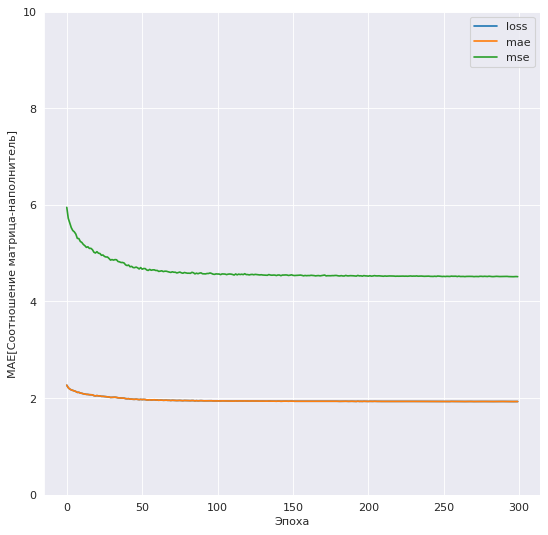

In [117]:
plt.figure(figsize=(8,8),dpi=80)
plot_loss(history)

In [118]:
res = model.predict(x_test)
r2_score(y_test, np.ravel(res))

-4.826564545340021

In [111]:
y_test.shape

(281, 1)

In [119]:
a = {'Предсказанные': np.ravel(res), 'Реальные': np.ravel(y_test.values)}
results = pd.DataFrame(data = a)
results

,Предсказанные,Реальные
0,0.999828,3.536386
1,0.999828,1.857143
2,0.999828,3.298776
3,0.999828,3.950352
4,0.999828,2.520207
...,...,...
276,0.999828,2.683784
277,0.999828,4.422466
278,0.999828,4.029126
279,0.999828,1.298167


In [120]:
inputs_nn = df[input_columns]
outputs_nn = df[output_columns]

norm2 = Normalizer()
res4 = norm.fit_transform(inputs_nn)
normalized_inputs2 = pd.DataFrame(res4, columns=inputs_nn.columns)

In [121]:
poly = PolynomialFeatures(degree=3)
regressor = LinearRegression()

poly_features = poly.fit_transform(normalized_inputs2)

x_train, x_test, y_train, y_test = train_test_split(poly_features, outputs_nn, test_size=0.3)
 
regressor.fit(x_train, y_train)
p = regressor.predict(x_test)
r2_score(p, y_test)



-0.0917882865207329

Меняем параметры модели

In [ ]:
model = models.Sequential([
                           #Flatten(input_shape=(12,))
                           Dense(128, input_shape=(12,), activation='sigmoid'),
                           #Input((9,)),
                           Dropout(0.25),
                           #tf.keras.layers.concatenate(inputs),
                           Dense(64, activation='sigmoid'),
                           Dropout(0.25),
                           Dense(16, activation='sigmoid'),
                           Dropout(0.25),
                           Dense(4, activation='sigmoid'),
                           Dropout(0.25),
                           Dense(1, activation='sofmax'),])
                           
                           
model.summary()